In [2]:
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn import metrics
from sklearn import utils
from sklearn import model_selection
import matplotlib.pyplot as plt

In [3]:
gpus = tf.config.list_physical_devices('GPU')

In [4]:
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [5]:
tf.config.set_visible_devices(gpus[0], 'GPU')

In [6]:
traindata = np.load('CNNTrainSet.npy',allow_pickle=True)
testdata = np.load('CNNTestSet.npy',allow_pickle=True)

In [7]:
traindata = traindata[()]
testdata = testdata[()]

In [8]:
for key in traindata.keys():
    print(key)

Train Labels
Subband
Persistence
DM Plots


In [10]:
model2dsub = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 200, 1)), #layer with 112 nodes
            layers.MaxPooling2D((2, 2)), #layer with 112 nodes
            layers.Flatten(),
            layers.Dense(10, activation='relu'),
            layers.Dense(1, activation='sigmoid')]) #output layer, 1 node 
#, input_shape=(1, 128, 200)

In [11]:
model2dsub.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 198, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 99, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 199584)            0         
                                                                 
 dense_3 (Dense)             (None, 10)                1995850   
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,996,181
Trainable params: 1,996,181
Non-trainable params: 0
____________________________________________

In [12]:
model2dsub.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [13]:
trainsub = np.array(traindata['Subband'])
#trainsub2 = trainsub.reshape(len(trainsub),-1)
testsub = np.array(testdata['Subband'])
#testsub2 = testsub.reshape(len(testsub),-1)
trainsublabels = np.array(traindata['Train Labels'])

In [14]:
np.shape(trainsub)

(6444, 128, 200)

In [15]:
history = model2dsub.fit(trainsub, trainsublabels, epochs=10, 
                    validation_split = 0.2, batch_size = 1)

Epoch 1/10
5155/5155 [==============================] - 15s 2ms/step - loss: 0.5465 - accuracy: 0.7511 - val_loss: 0.4299 - val_accuracy: 0.8557
Epoch 2/10
5155/5155 [==============================] - 11s 2ms/step - loss: 0.4003 - accuracy: 0.8535 - val_loss: 0.3219 - val_accuracy: 0.9170
Epoch 3/10
5155/5155 [==============================] - 11s 2ms/step - loss: 0.3119 - accuracy: 0.8857 - val_loss: 0.2872 - val_accuracy: 0.8798
Epoch 4/10
5155/5155 [==============================] - 11s 2ms/step - loss: 0.2728 - accuracy: 0.9032 - val_loss: 0.2492 - val_accuracy: 0.9030
Epoch 5/10
5155/5155 [==============================] - 11s 2ms/step - loss: 0.2476 - accuracy: 0.9137 - val_loss: 0.2234 - val_accuracy: 0.9333
Epoch 6/10
5155/5155 [==============================] - 11s 2ms/step - loss: 0.2237 - accuracy: 0.9176 - val_loss: 0.2214 - val_accuracy: 0.9294
Epoch 7/10
5155/5155 [==============================] - 11s 2ms/step - loss: 0.2030 - accuracy: 0.9274 - val_loss: 0.1691 - val_ac

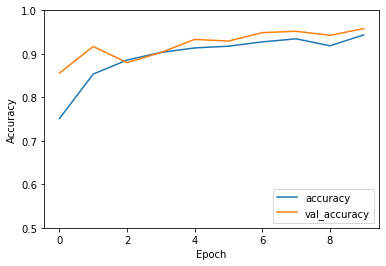

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [17]:
predictions = model2dsub.predict(testsub)

63/63 [==============================] - 0s 2ms/step


AUC Score: 0.983935


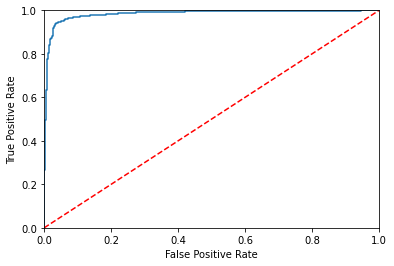

In [18]:
testsublabels = np.array(testdata['Train Labels'])
falsepos, truepos, thresholds = metrics.roc_curve(testsublabels, predictions)
display = metrics.RocCurveDisplay(fpr=falsepos, tpr=truepos)
auc = metrics.auc(falsepos, truepos)
print("AUC Score:", auc)
display.plot()
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"r--")

In [19]:
np.shape(predictions)

(2000, 1)

In [21]:
trainpers = np.array(traindata['Persistence'])
#trainsub2 = trainsub.reshape(len(trainsub),-1)
testpers = np.array(testdata['Persistence'])
#testsub2 = testsub.reshape(len(testsub),-1)
trainperslabels = np.array(traindata['Train Labels'])

In [23]:
np.shape(trainpers)

(6444, 200, 50)

In [24]:
model2dpers = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 50, 1)), #layer with 112 nodes
            layers.MaxPooling2D((2, 2)), #layer with 112 nodes
            layers.Flatten(),
            layers.Dense(10, activation='relu'),
            layers.Dense(1, activation='sigmoid')]) #output layer, 1 node 

In [25]:
model2dpers.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [26]:
historypers = model2dpers.fit(trainpers, trainperslabels, epochs=10, 
                    validation_split = 0.2, batch_size = 1)

Epoch 1/10
5155/5155 [==============================] - 10s 2ms/step - loss: 0.5763 - accuracy: 0.7195 - val_loss: 0.3911 - val_accuracy: 0.8627
Epoch 2/10
5155/5155 [==============================] - 9s 2ms/step - loss: 0.3914 - accuracy: 0.8425 - val_loss: 0.3634 - val_accuracy: 0.8588
Epoch 3/10
5155/5155 [==============================] - 9s 2ms/step - loss: 0.3447 - accuracy: 0.8584 - val_loss: 0.6550 - val_accuracy: 0.4942
Epoch 4/10
5155/5155 [==============================] - 9s 2ms/step - loss: 0.3503 - accuracy: 0.8524 - val_loss: 0.3915 - val_accuracy: 0.8495
Epoch 5/10
5155/5155 [==============================] - 9s 2ms/step - loss: 0.3049 - accuracy: 0.8739 - val_loss: 0.3048 - val_accuracy: 0.8813
Epoch 6/10
5155/5155 [==============================] - 9s 2ms/step - loss: 0.2953 - accuracy: 0.8743 - val_loss: 0.5979 - val_accuracy: 0.4926
Epoch 7/10
5155/5155 [==============================] - 9s 2ms/step - loss: 0.3377 - accuracy: 0.8345 - val_loss: 0.3168 - val_accuracy

In [28]:
predictionspers = model2dpers.predict(testpers)

63/63 [==============================] - 0s 1ms/step


AUC Score: 0.9466615


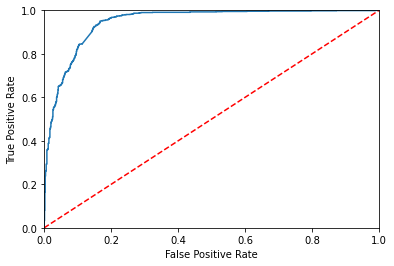

In [30]:
testperslabels = np.array(testdata['Train Labels'])
falsepos, truepos, thresholds = metrics.roc_curve(testperslabels, predictionspers)
display = metrics.RocCurveDisplay(fpr=falsepos, tpr=truepos)
auc = metrics.auc(falsepos, truepos)
print("AUC Score:", auc)
display.plot()
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"r--")

In [9]:
testdm = np.array(testdata['DM Plots'])
flattestdm = testdm.reshape(2000,-1)
traindm = np.array(traindata['DM Plots'])
flattraindm = traindm.reshape(6444,-1)
testdmlabels = np.array(testdata['Train Labels'])
traindmlabels = np.array(traindata['Train Labels'])

In [10]:
np.shape(traindm)

(6444, 2, 60)

In [11]:
np.shape(flattraindm)

(6444, 120)

In [12]:
model1d_dm = models.Sequential([layers.Conv1D(64, 6, activation='relu', input_shape = (120,1)), 
            layers.MaxPooling1D(2), 
            layers.Conv1D(32, 3, activation='relu'), 
            layers.MaxPooling1D(1),
            layers.Flatten(),
            layers.Dense(10, activation='relu'),
            layers.Dense(1, activation='sigmoid')]) #output layer, 1 node 

In [13]:
model1d_dm.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [14]:
model1d_dm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 115, 64)           448       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 57, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 55, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 55, 32)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 1760)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [15]:
historydm = model1d_dm.fit(flattraindm, traindmlabels, epochs=5, 
                    validation_split = 0.2, batch_size = None)

Epoch 1/5
162/162 [==============================] - 5s 5ms/step - loss: 0.8771 - accuracy: 0.6303 - val_loss: 0.6048 - val_accuracy: 0.6323
Epoch 2/5
162/162 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.6599 - val_loss: 0.6495 - val_accuracy: 0.6850
Epoch 3/5
162/162 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.6850 - val_loss: 0.5855 - val_accuracy: 0.7145
Epoch 4/5
162/162 [==============================] - 0s 3ms/step - loss: 0.5421 - accuracy: 0.7265 - val_loss: 0.5307 - val_accuracy: 0.7246
Epoch 5/5
162/162 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7447 - val_loss: 0.4840 - val_accuracy: 0.7735


In [16]:
predictionsdm = model1d_dm.predict(flattestdm)

63/63 [==============================] - 0s 1ms/step


In [17]:
print(*predictionsdm)

[0.14419298] [0.06445108] [0.7671889] [0.32557768] [0.72513646] [0.7639944] [0.92234814] [0.10391603] [0.6112644] [0.04836661] [0.04270568] [0.2914092] [0.44976205] [0.03511945] [0.27821177] [0.5113988] [0.5807397] [0.9968754] [0.7473732] [0.4987474] [0.25029805] [0.4131177] [0.7116684] [0.06894197] [0.02989104] [0.7620418] [0.6705777] [0.6508804] [0.51685816] [0.99191415] [0.6318085] [0.39164025] [0.05594552] [0.8208067] [0.28180662] [0.79397225] [0.64748526] [0.25957817] [0.51372707] [0.65847284] [0.5465665] [0.6299171] [0.05315144] [0.57535577] [0.05345403] [0.36214584] [0.56294036] [0.07044484] [0.05701738] [0.7695985] [0.78121656] [0.5691798] [0.4152579] [0.6072135] [0.07336187] [0.56707186] [1.] [0.77400446] [0.38433304] [0.3004062] [0.59058356] [0.11917344] [0.39569864] [0.5534325] [0.5068794] [0.2642699] [0.2859903] [0.5667446] [0.03103939] [3.930338e-06] [0.51500595] [0.45200223] [0.22175424] [0.9011557] [0.99746895] [0.42638442] [0.61771953] [0.59463054] [0.8520691] [0.283000

AUC Score: 0.8728355000000001


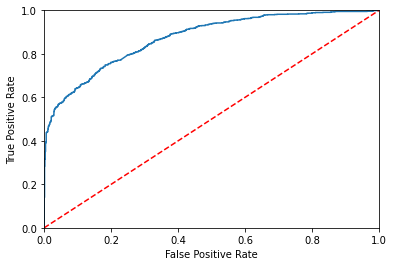

In [18]:
testdmlabels = np.array(testdata['Train Labels'])
falsepos, truepos, thresholds = metrics.roc_curve(testdmlabels, predictionsdm)
display = metrics.RocCurveDisplay(fpr=falsepos, tpr=truepos)
auc = metrics.auc(falsepos, truepos)
print("AUC Score:", auc)
display.plot()
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"r--")

In [ ]:
#1D CNN persistence below

In [25]:
testpers = np.array(testdata['Persistence'])
flattestpers = testdm.reshape(2000,-1)
trainpers = np.array(traindata['Persistence'])
flattrainpers = traindm.reshape(6444,-1)
testperslabels = np.array(testdata['Train Labels'])
trainperslabels = np.array(traindata['Train Labels'])

In [37]:
np.shape(trainpers)

(6444, 200, 50)

In [28]:
model1d_pers = models.Sequential([layers.Conv1D(64, 6, activation='relu', input_shape = (120,1)), 
            layers.MaxPooling1D(2), 
            layers.Conv1D(32, 3, activation='relu'), 
            layers.MaxPooling1D(1),
            layers.Flatten(),
            layers.Dense(10, activation='relu'),
            layers.Dense(1, activation='sigmoid')]) #output layer, 1 node 

In [30]:
model1d_pers.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [31]:
model1d_pers.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 115, 64)           448       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 57, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 55, 32)            6176      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 55, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1760)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [40]:
historypers1d = model1d_pers.fit(flattrainpers, trainperslabels, epochs=100, 
                    validation_split = 0.2, batch_size = None)

Epoch 1/100
162/162 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8566 - val_loss: 0.4888 - val_accuracy: 0.8371
Epoch 2/100
162/162 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8468 - val_loss: 0.5978 - val_accuracy: 0.8254
Epoch 3/100
162/162 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8658 - val_loss: 0.6924 - val_accuracy: 0.8479
Epoch 4/100
162/162 [==============================] - 0s 3ms/step - loss: 0.3104 - accuracy: 0.8603 - val_loss: 0.9067 - val_accuracy: 0.7882
Epoch 5/100
162/162 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8411 - val_loss: 0.7124 - val_accuracy: 0.8456
Epoch 6/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.8056 - val_loss: 0.4143 - val_accuracy: 0.8068
Epoch 7/100
162/162 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8202 - val_loss: 0.3863 - val_accuracy: 0.8231

Epoch 58/100
162/162 [==============================] - 0s 3ms/step - loss: 0.1929 - accuracy: 0.9238 - val_loss: 0.6563 - val_accuracy: 0.8875
Epoch 59/100
162/162 [==============================] - 0s 3ms/step - loss: 0.2015 - accuracy: 0.9156 - val_loss: 0.4631 - val_accuracy: 0.9030
Epoch 60/100
162/162 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.9226 - val_loss: 0.5783 - val_accuracy: 0.8852
Epoch 61/100
162/162 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9286 - val_loss: 0.5525 - val_accuracy: 0.9108
Epoch 62/100
162/162 [==============================] - 0s 3ms/step - loss: 0.1956 - accuracy: 0.9269 - val_loss: 0.4413 - val_accuracy: 0.8883
Epoch 63/100
162/162 [==============================] - 0s 3ms/step - loss: 0.1854 - accuracy: 0.9271 - val_loss: 0.5964 - val_accuracy: 0.9061
Epoch 64/100
162/162 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9172 - val_loss: 0.3212 - val_accuracy:

In [41]:
predictionspers1d = model1d_pers.predict(flattestpers)

63/63 [==============================] - 0s 1ms/step


AUC Score: 0.961758


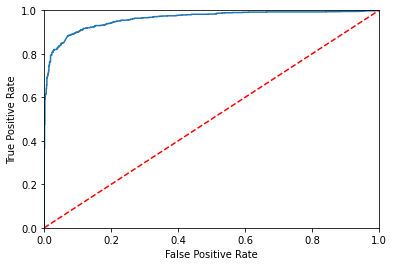

In [42]:
falsepos, truepos, thresholds = metrics.roc_curve(testperslabels, predictionspers1d)
display = metrics.RocCurveDisplay(fpr=falsepos, tpr=truepos)
auc = metrics.auc(falsepos, truepos)
print("AUC Score:", auc)
display.plot()
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],"r--")